In [246]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [247]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
# matplotlib.patches allows us create colored patches, we can use for legends in plots
import matplotlib.patches as mpatches
# seaborn also builds on matplotlib and adds graphical features and new plot types
#adjust settings
%matplotlib inline

In [248]:
df1 = pd.read_csv("/content/drive/My Drive/Collisions.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [249]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221525 entries, 0 to 221524
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                214050 non-null  float64
 1   Y                214050 non-null  float64
 2   OBJECTID         221525 non-null  int64  
 3   INCKEY           221525 non-null  int64  
 4   COLDETKEY        221525 non-null  int64  
 5   REPORTNO         221525 non-null  object 
 6   STATUS           221525 non-null  object 
 7   ADDRTYPE         217813 non-null  object 
 8   INTKEY           71936 non-null   float64
 9   LOCATION         216935 non-null  object 
 10  EXCEPTRSNCODE    101122 non-null  object 
 11  EXCEPTRSNDESC    11779 non-null   object 
 12  SEVERITYCODE     221524 non-null  object 
 13  SEVERITYDESC     221525 non-null  object 
 14  COLLISIONTYPE    195212 non-null  object 
 15  PERSONCOUNT      221525 non-null  int64  
 16  PEDCOUNT         221525 non-null  int6

In [250]:
df = df1.filter(["X","Y","ADDRTYPE","COLLISIONTYPE","SEVERITYCODE","JUNCTIONTYPE","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","INJURIES","SERIOUSINJURIES","FATALITIES","SPEEDING"])

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221525 entries, 0 to 221524
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                214050 non-null  float64
 1   Y                214050 non-null  float64
 2   ADDRTYPE         217813 non-null  object 
 3   COLLISIONTYPE    195212 non-null  object 
 4   SEVERITYCODE     221524 non-null  object 
 5   JUNCTIONTYPE     209551 non-null  object 
 6   UNDERINFL        195232 non-null  object 
 7   WEATHER          195022 non-null  object 
 8   ROADCOND         195103 non-null  object 
 9   LIGHTCOND        194933 non-null  object 
 10  INJURIES         221525 non-null  int64  
 11  SERIOUSINJURIES  221525 non-null  int64  
 12  FATALITIES       221525 non-null  int64  
 13  SPEEDING         9929 non-null    object 
dtypes: float64(2), int64(3), object(9)
memory usage: 23.7+ MB


In [252]:
df.drop(df.loc[df["SEVERITYCODE"]=="0"].index, inplace=True)
df.drop(df.loc[df["SEVERITYCODE"]=="3"].index, inplace=True)
df.drop(df.loc[df["SEVERITYCODE"]=="2b"].index, inplace=True)


df["SEVERITYCODE"]=df["SEVERITYCODE"].astype(float)

In [253]:

injured_pd = df[np.logical_and(np.logical_and(df['INJURIES']!=0, df['FATALITIES']==0),df['SERIOUSINJURIES']==0)]
seriouslyinjured_pd = df[np.logical_and(np.logical_and(df['INJURIES']!=0, df['FATALITIES']==0),df['SERIOUSINJURIES']!=0)]
nothing_pd = df[np.logical_and(np.logical_and(df['FATALITIES']==0, df['INJURIES']==0),df['SERIOUSINJURIES']==0)]
killed_pd = df[np.logical_and(np.logical_and(df['INJURIES']==0, df['FATALITIES']!=0),df['SERIOUSINJURIES']==0)]

In [254]:
seriouslyinjured_pd.shape

(0, 14)

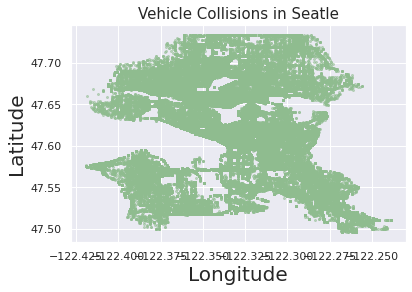

In [255]:
plt.scatter(df.X, df.Y, alpha=0.5, s=4, color='darkseagreen')

plt.title('Vehicle Collisions in Seatle', size=15)
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)

plt.show()

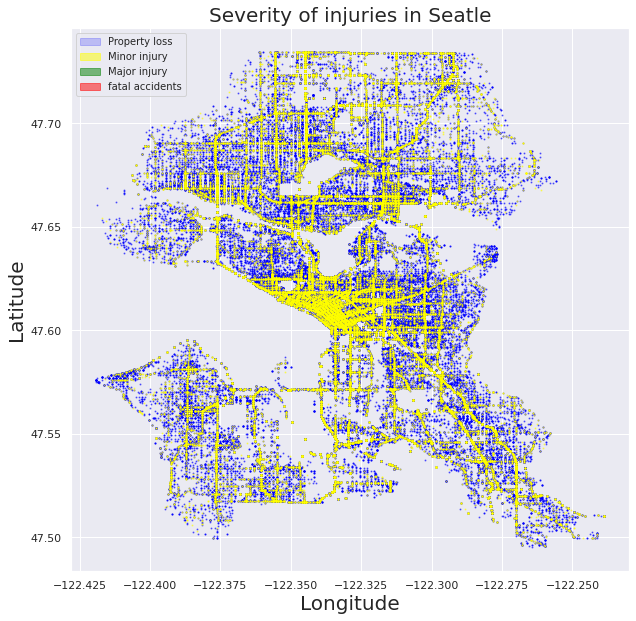

In [256]:
#adjust settings
plt.figure(figsize=(10,10))


#create scatterplots
plt.scatter(nothing_pd.X, nothing_pd.Y, alpha=0.5, s=1, color='blue')
plt.scatter(injured_pd.X, injured_pd.Y, alpha=0.5, s=1, color='yellow')
plt.scatter(seriouslyinjured_pd.X, seriouslyinjured_pd.Y, alpha=0.5, s=1, color='green')
plt.scatter(killed_pd.X, killed_pd.Y, color='red',alpha=0.5, s=1)

#create legend
blue_patch = mpatches.Patch( label='Property loss', alpha=0.2, color='blue')
yellow_patch = mpatches.Patch(color='yellow', label='Minor injury', alpha=0.5)
green_patch = mpatches.Patch(color='green', label='Major injury', alpha=0.5)
red_patch = mpatches.Patch(color='red', label='Fatal Accident',alpha=0.5)
plt.legend([blue_patch, yellow_patch, green_patch,red_patch],('Property loss', 'Minor injury','Major injury' ,'fatal accidents'), 
           loc='upper left', prop={'size':10})

plt.title('Severity of injuries in Seatle', size=20)
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)


plt.show()

In [257]:
#df.drop(df.loc[df["SEVERITYCODE"]=="0"].index, inplace=True)
#df.drop(df.loc[df["SEVERITYCODE"]=="3"].index, inplace=True)

In [258]:
df.shape


(196455, 14)

In [259]:
df.dropna(subset = ["X","Y","ADDRTYPE","COLLISIONTYPE","JUNCTIONTYPE","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","INJURIES","SEVERITYCODE"], inplace=True)

In [260]:
df.shape


(8776, 14)

In [261]:
df.isnull().sum()

X                  0
Y                  0
ADDRTYPE           0
COLLISIONTYPE      0
SEVERITYCODE       0
JUNCTIONTYPE       0
UNDERINFL          0
WEATHER            0
ROADCOND           0
LIGHTCOND          0
INJURIES           0
SERIOUSINJURIES    0
FATALITIES         0
SPEEDING           0
dtype: int64

severity 1 - property loss,2 - major injury

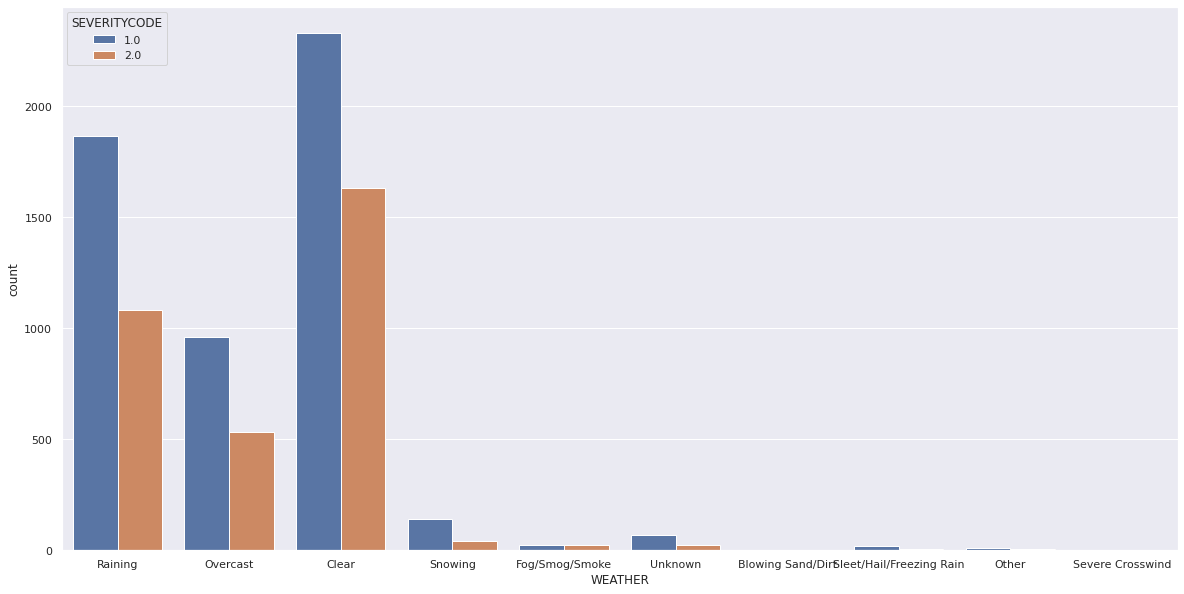

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(20, 10))
ax = sns.countplot(df['WEATHER'], hue=df['SEVERITYCODE'])

In [263]:
df.drop(df.loc[df['WEATHER']=="Unknown"].index, inplace=True)

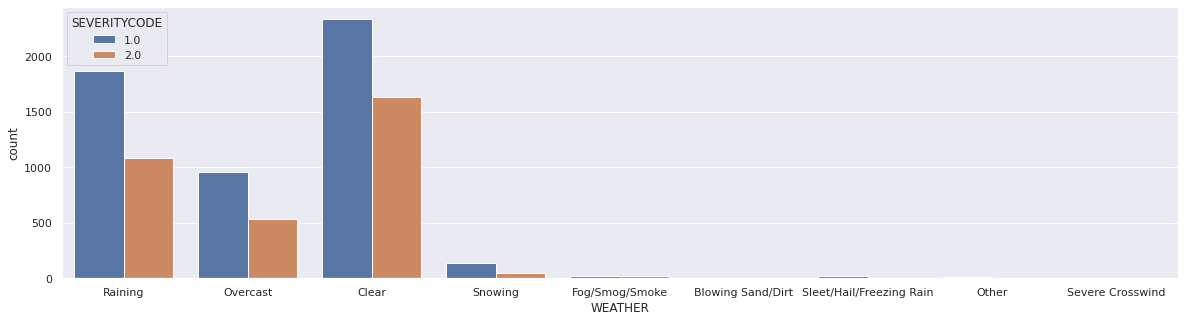

In [264]:
plt.figure(figsize=(20, 5))
ax = sns.countplot(df['WEATHER'], hue=df['SEVERITYCODE'])

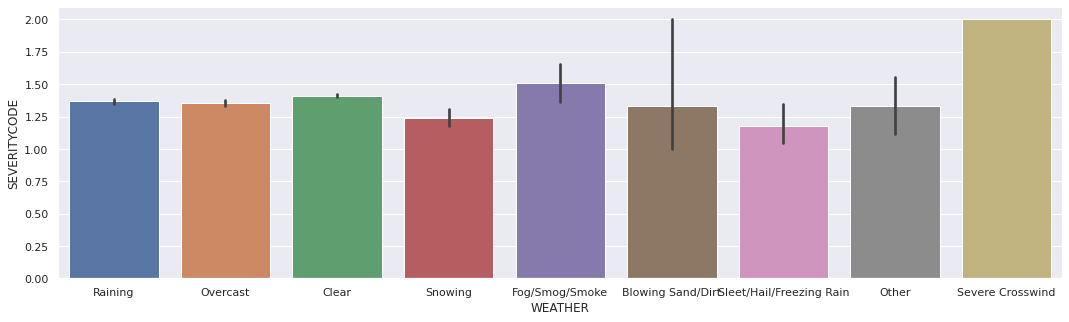

In [265]:
plt.figure(figsize=(18, 5))
ax = sns.barplot(df['WEATHER'],df['SEVERITYCODE'])

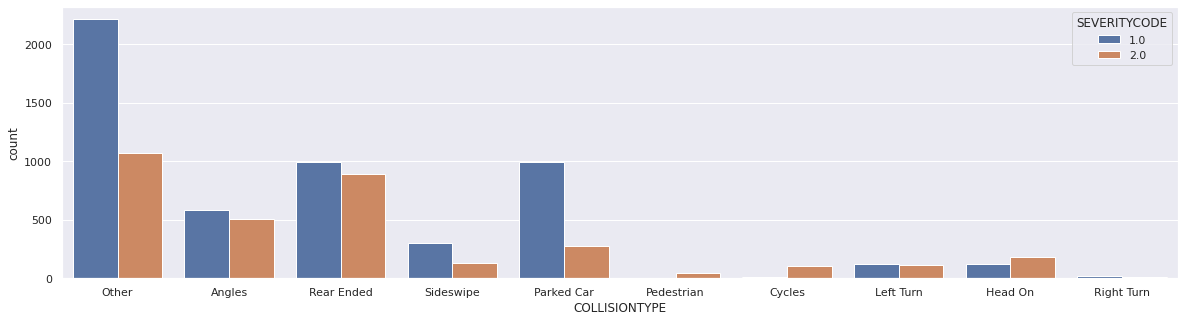

In [266]:
 

plt.figure(figsize=(20, 5))
ax = sns.countplot(df['COLLISIONTYPE'], hue=df['SEVERITYCODE'])

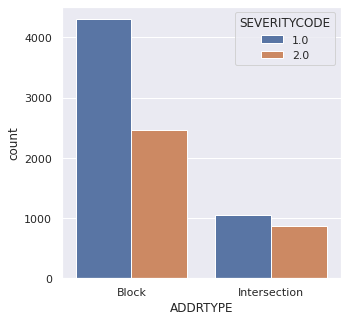

In [267]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(df['ADDRTYPE'], hue=df['SEVERITYCODE'])

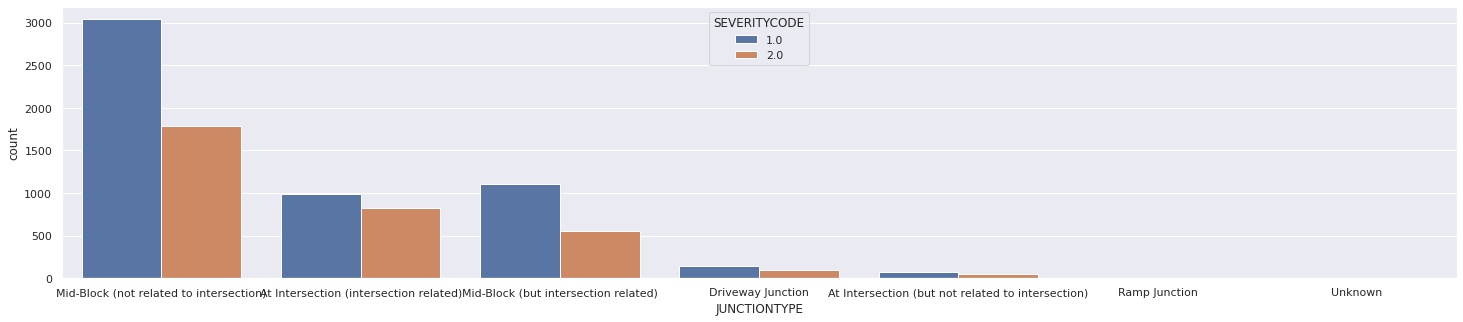

In [268]:
plt.figure(figsize=(25,5))
ax = sns.countplot(df['JUNCTIONTYPE'], hue=df['SEVERITYCODE'])

In [269]:
df.drop(df.loc[df['JUNCTIONTYPE']=="Unknown"].index, inplace=True)

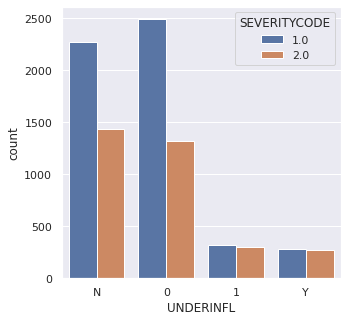

In [270]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(df['UNDERINFL'], hue=df['SEVERITYCODE'])

In [271]:
df = df.replace(to_replace="Y", value="1")
df = df.replace(to_replace="N", value="0")

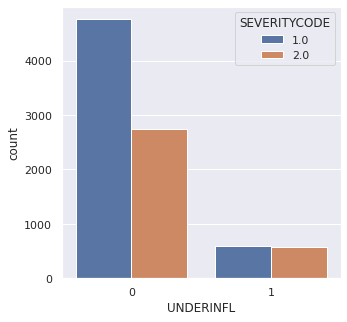

In [272]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(df['UNDERINFL'], hue=df['SEVERITYCODE'])

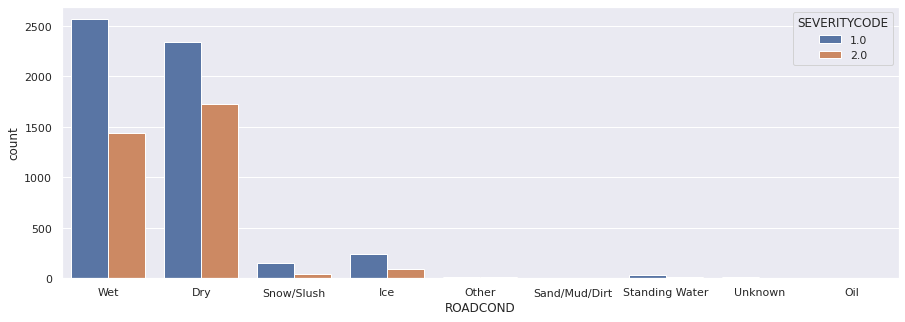

In [273]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(df['ROADCOND'], hue=df['SEVERITYCODE'])

In [274]:
df.drop(df.loc[df['ROADCOND']=="Unknown"].index, inplace=True)

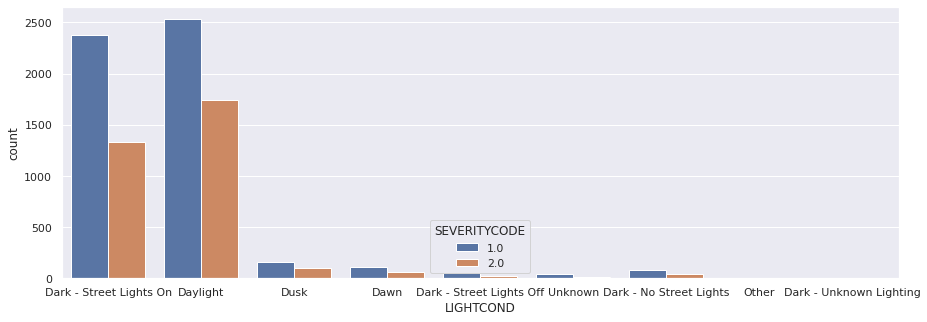

In [275]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(df['LIGHTCOND'], hue=df['SEVERITYCODE'])

In [276]:
df.drop(df.loc[df['LIGHTCOND']=="Unknown"].index, inplace=True)

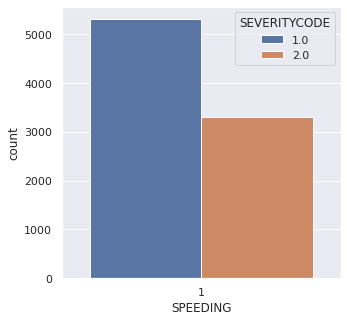

In [277]:

plt.figure(figsize=(5, 5))
ax = sns.countplot(df['SPEEDING'], hue=df['SEVERITYCODE'])

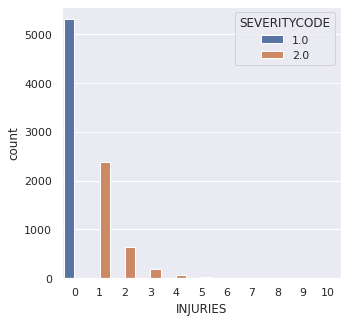

In [278]:

plt.figure(figsize=(5, 5))
ax = sns.countplot(df['INJURIES'], hue=df['SEVERITYCODE'])

Text(0, 0.5, 'Frequency')

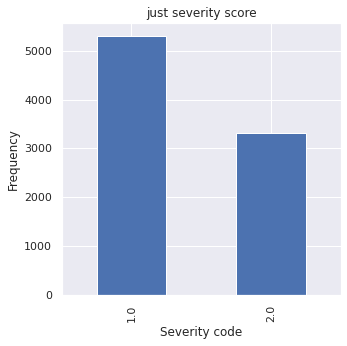

In [279]:
ax = df['SEVERITYCODE'].value_counts().plot(kind='bar',
                                    figsize=(5,5),
                                    title="just severity score")
ax.set_xlabel("Severity code")
ax.set_ylabel("Frequency")

In [280]:
df.shape

(8612, 14)

Hence the code is biased.......

In [281]:
df.drop(df[df.SEVERITYCODE.eq(1)].sample(frac=.4).index,inplace=True)

In [282]:
df.shape

(6492, 14)

Text(0, 0.5, 'Frequency')

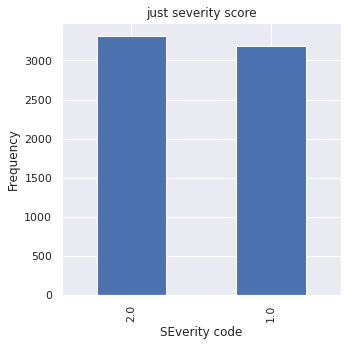

In [283]:
ax = df['SEVERITYCODE'].value_counts().plot(kind='bar',
                                    figsize=(5,5),
                                    title="just severity score")
ax.set_xlabel("SEverity code")
ax.set_ylabel("Frequency")

Mutual Information

In [284]:
df.head()

,X,Y,ADDRTYPE,COLLISIONTYPE,SEVERITYCODE,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,INJURIES,SERIOUSINJURIES,FATALITIES,SPEEDING
49,-122.376761,47.676820,Block,Other,1.0,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,0,0,0,1
58,-122.333961,47.706850,Intersection,Angles,1.0,At Intersection (intersection related),0,Overcast,Wet,Daylight,0,0,0,1
67,-122.365472,47.565449,Intersection,Other,1.0,At Intersection (intersection related),0,Clear,Dry,Dark - Street Lights On,0,0,0,1
91,-122.279658,47.553405,Intersection,Rear Ended,2.0,At Intersection (intersection related),0,Clear,Dry,Daylight,3,0,0,1
140,-122.326161,47.687682,Block,Other,1.0,Mid-Block (not related to intersection),0,Raining,Wet,Daylight,0,0,0,1


In [289]:
df= df[["ADDRTYPE","COLLISIONTYPE","JUNCTIONTYPE","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]

In [290]:
#df["LIGHTCOND"]=df["LIGHTCOND"].replace("Daylight",1)
df["LIGHTCOND"]=df["LIGHTCOND"].replace("Dark - Unknown Lighting","Daylight")
#df["LIGHTCOND"]=df["LIGHTCOND"].replace("Dusk",0)
#df["LIGHTCOND"]=df["LIGHTCOND"].replace("Dawn",1)
#df["LIGHTCOND"]=df["LIGHTCOND"].replace("Other",0)
#df["LIGHTCOND"]=df["LIGHTCOND"].replace("Dark - Street Lights On",1)
#df["LIGHTCOND"]=df["LIGHTCOND"].replace("Dark - Street Lights Off",1)
#df["LIGHTCOND"]=df["LIGHTCOND"].replace("Dark - No Street Lights",1)

In [291]:
df.head()

,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
49,Block,Other,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,1,1.0
58,Intersection,Angles,At Intersection (intersection related),0,Overcast,Wet,Daylight,1,1.0
67,Intersection,Other,At Intersection (intersection related),0,Clear,Dry,Dark - Street Lights On,1,1.0
91,Intersection,Rear Ended,At Intersection (intersection related),0,Clear,Dry,Daylight,1,2.0
140,Block,Other,Mid-Block (not related to intersection),0,Raining,Wet,Daylight,1,1.0


[['Block' 'Other' 'Mid-Block (not related to intersection)' ... 'Wet'
  'Dark - Street Lights On' '1']
 ['Intersection' 'Angles' 'At Intersection (intersection related)' ...
  'Wet' 'Daylight' '1']
 ['Intersection' 'Other' 'At Intersection (intersection related)' ...
  'Dry' 'Dark - Street Lights On' '1']
 ...
 ['Block' 'Angles' 'Mid-Block (not related to intersection)' ... 'Wet'
  'Daylight' '1']
 ['Block' 'Parked Car' 'Mid-Block (not related to intersection)' ...
  'Other' 'Dark - Street Lights On' '1']
 ['Intersection' 'Angles' 'At Intersection (intersection related)' ...
  'Dry' 'Dark - Street Lights On' '1']]
[1.0 1.0 1.0 ... 1.0 2.0 2.0]
Index(['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'SPEEDING'],
      dtype='object')
Feature 0 ADDRTYPE: 0.001749
Feature 1 COLLISIONTYPE: 0.027733
Feature 2 JUNCTIONTYPE: 0.000000
Feature 3 UNDERINFL: 0.008319
Feature 4 WEATHER: 0.010735
Feature 5 ROADCOND: 0.000000
Feature 6 LIGHTCOND: 0

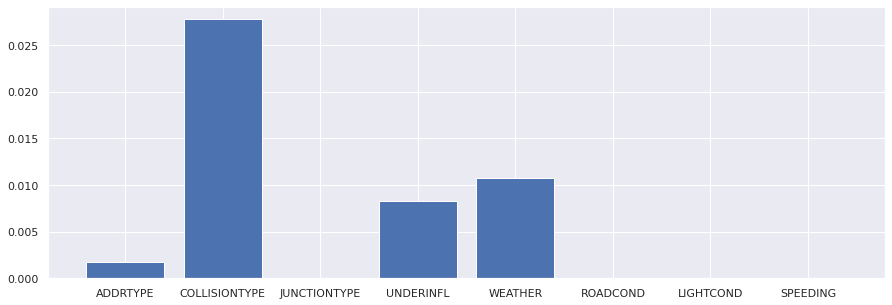

In [294]:
# example of mutual information feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

# load the dataset
#def load_dataset(filename):
	# load the dataset as a pandas DataFrame
#	data = read_csv(filename, header=None)
	# retrieve numpy array
#	dataset = df.values
	# split into input (X) and output (y) variables
#	X = dataset[:, :-1]
#	y = dataset[:,-1]
	# format all fields as string
#	X = X.astype(str)
#	return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# load the dataset
#X, y = load_dataset('breast-cancer.csv')
# split into train and test sets
dataset = df.values
# split into input (X) and output (y) variables
X = dataset[:, 0:-1]
y = dataset[:,-1]

print(X)
print(y)

# format all fields as string
X = X.astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
data = df.columns
data = data[0:-1]
print(data)
for i in range(len(fs.scores_)):
	print('Feature %d %s: %f' % (i,data[i], fs.scores_[i]))
# plot the scores
#print(len(fs.scores_))
#set(gca,'xticklabel', {"ADDRTYPE","COLLISIONTYPE","JUNCTIONTYPE","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SERIOUSINJURIES","FATALITIES","SPEEDING","SEVERITYCODE"})
plt.figure(figsize=(15, 5))
LABELS = ["ADDRTYPE","COLLISIONTYPE","JUNCTIONTYPE","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
#plt.bar(DayOfWeekOfCall, DispatchesOnThisWeekday, align='center')
plt.xticks([i for i in range(len(fs.scores_))], LABELS)
#set(gca,'xticklabel', {"ADDRTYPE","COLLISIONTYPE","JUNCTIONTYPE","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SERIOUSINJURIES","FATALITIES","SPEEDING","SEVERITYCODE"})
pyplot.show()

now we know.....collision type..road cond......light condition have high priority and underinfl addrtype have less importance..


So lets try some machine learning Algorithms....



*   K-Nearest Neighbor (KNN)
*   Decision Tree (DT)
*   Support Vector Machine (SVM)
*   Logistic Regression(LR)
*   Random Forest (RF)


In [295]:
#Lets make a data frame by taking only COLLISONTYPE , ROADCOND , LIGHTCOND

dff = df.filter(["ADDRTYPE","COLLISIONTYPE","JUNCTIONTYPE","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"])

In [296]:
dff.head()

,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
49,Block,Other,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,1,1.0
58,Intersection,Angles,At Intersection (intersection related),0,Overcast,Wet,Daylight,1,1.0
67,Intersection,Other,At Intersection (intersection related),0,Clear,Dry,Dark - Street Lights On,1,1.0
91,Intersection,Rear Ended,At Intersection (intersection related),0,Clear,Dry,Daylight,1,2.0
140,Block,Other,Mid-Block (not related to intersection),0,Raining,Wet,Daylight,1,1.0


In [297]:
dff=pd.get_dummies(dff)


In [298]:
dff.head()

,SEVERITYCODE,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,UNDERINFL_0,UNDERINFL_1,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,SPEEDING_1
49,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
58,1.0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
67,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
91,2.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
140,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1


In [299]:
dff.shape

(6492, 46)

In [300]:
# split into input (X) and output (y) variables
from sklearn.model_selection import train_test_split


data = dff.values
X = data[:, 1:]
y = data[:,0]

#y = pd.get_dummies(y, drop_first=True)
#print(X)
#print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=1)

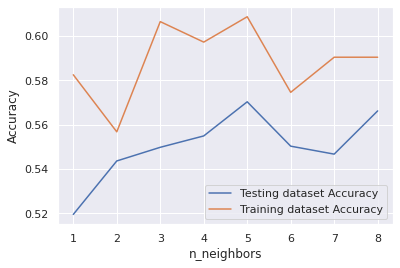

Accuracy
0.5503080082135524
Jaccard_Score is
0.4315379623621025
f1 Score
0.6029011786038079


In [302]:
#KNN

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
import seaborn as sns
sns.set()

#X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
#data = dff.values
# split into input (X) and output (y) variables
#X = data[:, 1:]
#y = data[:,0]

#y = pd.get_dummies(y, drop_first=True)
#print(X)
#print(y)


#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=1)

neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  
# Loop over K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 
  
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

#as results are good at 7 ...so I am taking 7
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
#print(y_pred)
print("Accuracy")
print(knn.score(X_test, y_test))
#confusion_matrix(y_test, y_pred)

print("Jaccard_Score is")
print(jaccard_score(y_test, y_pred))

print("f1 Score")
print(f1_score(y_test, y_pred))


In [303]:
#Support vector machine

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))
print("Jaccard_Score is")
print(jaccard_score(y_test, y_pred))

print("f1 Score")
print(f1_score(y_test, y_pred))
print("Accuracy")
print(accuracy_score(y_test, y_pred))


Jaccard_Score is
0.4286827747466875
f1 Score
0.6001091107474086
Accuracy
0.6237166324435318


In [304]:
#Decision Tree

# Run this program on your local python 
# interpreter, provided you have installed 
# the required libraries. 

# Importing the required packages 
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
#from sklearn.cross_validation import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 



	 
clf_entropy = DecisionTreeClassifier( criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5) 

# Performing training 
clf_entropy.fit(X_train, y_train) 
y_pred = clf_entropy.predict(X_test) 

#print("Predicted values:") 
#print(y_pred) 
#print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)
print("Accuracy")
print(accuracy_score(y_test, y_pred))
print("Jaccard_Score is")
print(jaccard_score(y_test, y_pred))
print("f1 Score")
print(f1_score(y_test, y_pred)) 

	 


Accuracy
0.61652977412731
Jaccard_Score is
0.4033546325878594
f1 Score
0.5748434832100171


In [306]:
#logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print ("Accuracy : ", accuracy_score(y_test,y_pred))
print("Jaccard_Score is")
print(jaccard_score(y_test, y_pred))
print("f1 Score")
print(f1_score(y_test, y_pred)) 


Accuracy :  0.6226899383983573
Jaccard_Score is
0.449438202247191
f1 Score
0.6201550387596899


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [307]:
#Random Forest (READ THIS)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

#confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
#sn.heatmap(confusion_matrix, annot=True)

print ("Accuracy : ", accuracy_score(y_test,y_pred))
print("Jaccard_Score is")
print(jaccard_score(y_test, y_pred))
print("f1 Score")
print(f1_score(y_test, y_pred)) 




Accuracy :  0.6078028747433265
Jaccard_Score is
0.4349112426035503
f1 Score
0.6061855670103092
